In [2]:
from PoE_GPFlow import Generalised_PoE
m = Generalised_PoE()

2025-07-15 09:33:18.967271: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
X = np.linspace(0, 10, 100).reshape(-1, 1)
Y = np.sin(X) + 0.05 * np.random.randn(100, 1)  # Noisy sine wave

m.train(X, Y, no_experts=3, allow_seperate_hyperparms=True)
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
mean, var, beta = m.predict(X_new)

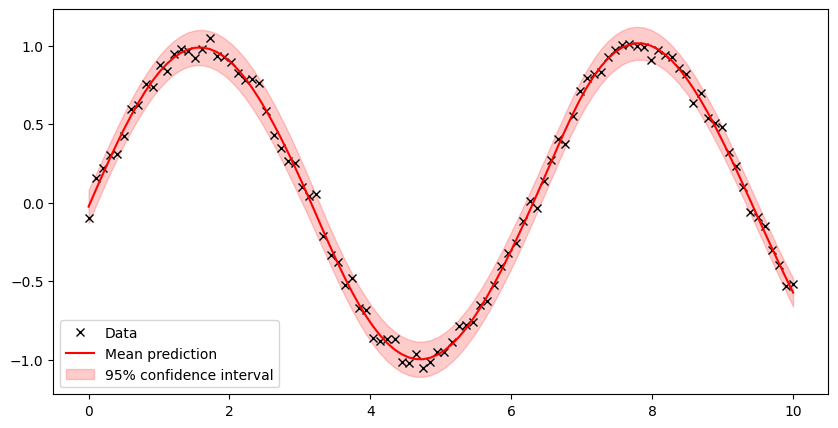

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(X, Y, 'kx', label='Data')
ax.plot(X_new, mean, 'r', label='Mean prediction')
ax.fill_between(X_new.flatten(), 
                mean.flatten() - 1.96 * np.sqrt(var.flatten()), 
                mean.flatten() + 1.96 * np.sqrt(var.flatten()), 
                color='red', alpha=0.2, label='95% confidence interval')
ax.legend()